In [2]:
%pylab inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, sys

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pareto', 'dist', 'norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [10]:
def threshold_ratio(k, a1,a2):
    return 2.0 / (k*(k-1) * a1 + (k-1)*np.sqrt(k*k*a1*a1 + 4*(a2-a1*a1)));

def analytical_simplicial_threshold_ratio(k1,k2,a1,a2):
    tot = (k2 - k1)*a1;
    t = (k2 -3*k1 +2) * (k2 + k1 -2) * a1**2 + 4*((k1-1)**2)*a2;
    tot += np.sqrt(t);
    return 2/tot;

def simplicial_threshold_ratio(ks,a1,a2):
    tot = 0;
    ks = np.array(ks)
    tot += np.mean(ks*(ks-1)) * a1;
    sqr = 0;
    sqr += np.mean((ks-2)*(ks-1)) * np.mean((ks-1)*(ks+2)) * (a1**2)
    sqr += 4*(np.mean(ks-1)**2)*a2
    tot += np.sqrt(sqr)
    return 2.0 / tot;

def act_threshold_ratio(m, a1,a2):
    return 1.0 / (m*a1 + m*np.sqrt(a2));


0.03845870832967195 0.0015790655301581064 1.0676054087388909
2 12.788350798704831
3 4.301579135066218
4 2.1577470993966195
5 1.2965988126010428
6 0.865108870974225


[0.007819616584972608,
 0.02324727660705017,
 0.046344634191821395,
 0.07712485853615349,
 0.11559238768108691]

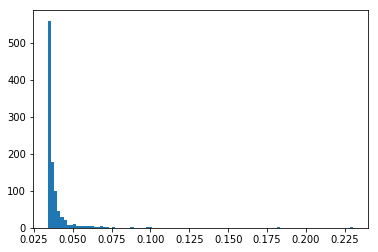

In [139]:
import time
epi  = {}
T  = 4000;
N = 1000;

# produce activities 
from scipy.stats import norm,pareto
b = 2.1
dist = pareto(b).rvs(500000)
dist = np.random.choice(dist,N)
act = dict(zip(range(N),0.03+dist/(5*np.max(dist)))) 
plt.hist(act.values(),100)
mu, v  = np.mean(act.values()), np.mean(np.array(act.values())**2)
print mu, v, v/(mu**2)

# predict thresholds
ks = range(2,7)
thrs = {}
for k in ks:
    thrs[k] = threshold_ratio(k,mu,v)
    print k, thrs[k]

max_lambda = 0.1;
[max_lambda / thrs[k] for k in thrs]

In [107]:
ks = range(2,12);
from scipy.stats import pareto, norm

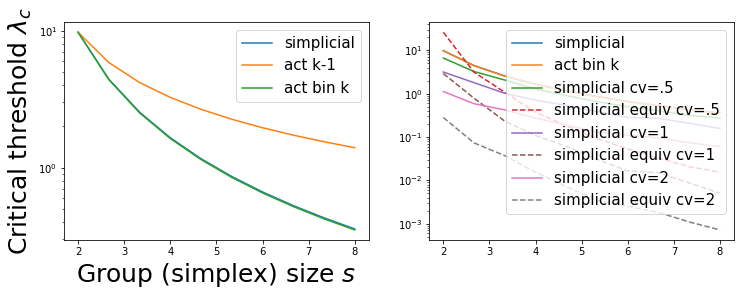

In [108]:
fig = plt.figure(figsize=(12,4))
plt.subplot(121)
kss = np.linspace(2,8,10)
plt.plot(kss, map(lambda x: threshold_ratio(x,np.mean(act.values()), np.mean(np.array(act.values())**2)), kss), label='simplicial')
plt.plot(kss, map(lambda x: act_threshold_ratio(x-1,np.mean(act.values()), np.mean(np.array(act.values())**2)),kss), label='act k-1')
plt.semilogy(kss, map(lambda x: act_threshold_ratio(x*(x-1)/2,np.mean(act.values()), np.mean(np.array(act.values())**2)),kss), label='act bin k')
plt.legend(loc=0, fontsize=15)
plt.ylabel(r'Critical threshold $\lambda_c$', fontsize=25)
plt.xlabel(r'Group (simplex) size $s$', fontsize=25)


plt.subplot(122)
plt.plot(kss, map(lambda x: threshold_ratio(x,np.mean(act.values()), np.mean(np.array(act.values())**2)), kss), label='simplicial')
plt.semilogy(kss, map(lambda x: act_threshold_ratio(x*(x-1)/2,np.mean(act.values()), np.mean(np.array(act.values())**2)),kss), label='act bin k')

cv = 0.5
simp = []
ms = []
for k in kss:
    dis = norm(loc=k, scale=k*cv)
    ks = dis.rvs(1000)
    simp.append(simplicial_threshold_ratio(ks,np.mean(act.values()), np.mean(np.array(act.values())**2)))
    mm = np.mean(map(lambda x: x*(x-1)/2, ks))
    ms.append(threshold_ratio(mm,np.mean(act.values()), np.mean(np.array(act.values())**2)))
plt.plot(kss, np.array(simp),label='simplicial cv=.5')
plt.plot(kss, np.array(ms),'--',label='simplicial equiv cv=.5')


cv = 1
simp = []
ms = []
for k in kss:
    dis = norm(loc=k, scale=k*cv)
    ks = dis.rvs(1000)
    simp.append(simplicial_threshold_ratio(ks,np.mean(act.values()), np.mean(np.array(act.values())**2)))
    mm = np.mean(map(lambda x: x*(x-1)/2, ks))
    ms.append(threshold_ratio(mm,np.mean(act.values()), np.mean(np.array(act.values())**2)))
plt.plot(kss, np.array(simp),label='simplicial cv=1')
plt.plot(kss, np.array(ms),'--',label='simplicial equiv cv=1')

cv = 2
simp = []
ms = []
for k in kss:
    dis = norm(loc=k, scale=k*cv)
    ks = dis.rvs(1000)
    simp.append(simplicial_threshold_ratio(ks,np.mean(act.values()), np.mean(np.array(act.values())**2)))
    mm = np.mean(map(lambda x: x*(x-1)/2, ks))
    ms.append(threshold_ratio(mm,np.mean(act.values()), np.mean(np.array(act.values())**2)))
plt.plot(kss, np.array(simp),label='simplicial cv=2')
plt.plot(kss, np.array(ms),'--',label='simplicial equiv cv=2')

plt.legend(loc=0, fontsize=15)


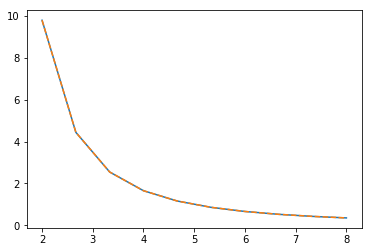

In [109]:
# sanity check 
a1, a2 = np.mean(act.values()), np.mean(np.array(act.values())**2)
plt.plot(kss, map(lambda x: analytical_simplicial_threshold_ratio(x,x**2,a1,a2), kss))
plt.plot(kss, map(lambda x: threshold_ratio(x,a1,a2), kss),'--')

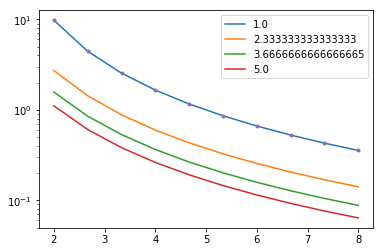

In [110]:
# sanity check 
sigma_factors = np.linspace(1,5,4);
a1, a2 = np.mean(act.values()), np.mean(np.array(act.values())**2)
for sigma in sigma_factors:
    plt.plot(kss, map(lambda x: analytical_simplicial_threshold_ratio(x,sigma*(x**2),a1,a2), kss), label=sigma)
plt.plot(kss, map(lambda x: threshold_ratio(x,a1,a2), kss),'.')
plt.legend(loc=0)
plt.yscale('log')

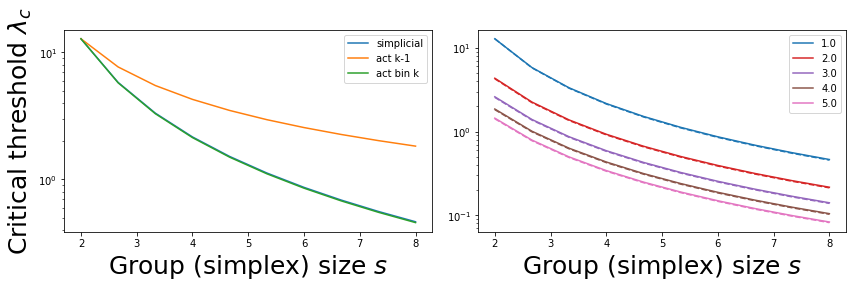

In [140]:
# sanity check 
fig = plt.figure(figsize=(12,4))
plt.subplot(121)
kss = np.linspace(2,8,10)
plt.plot(kss, map(lambda x: threshold_ratio(x,np.mean(act.values()), np.mean(np.array(act.values())**2)), kss), label='simplicial')
plt.plot(kss, map(lambda x: act_threshold_ratio(x-1,np.mean(act.values()), np.mean(np.array(act.values())**2)),kss), label='act k-1')
plt.semilogy(kss, map(lambda x: act_threshold_ratio(x*(x-1)/2,np.mean(act.values()), np.mean(np.array(act.values())**2)),kss), label='act bin k')
plt.legend(loc=0, fontsize=10)
plt.ylabel(r'Critical threshold $\lambda_c$', fontsize=25)
plt.xlabel(r'Group (simplex) size $s$', fontsize=25)

plt.subplot(122)
#colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
colors = ['tab:blue', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
sigma_factors = np.linspace(1,5,5);
a1, a2 = np.mean(act.values()), np.mean(np.array(act.values())**2)
for i, sigma in enumerate(sigma_factors):
    plt.plot(kss, map(lambda x: analytical_simplicial_threshold_ratio(x,sigma*(x**2),a1,a2), kss), label=sigma, color=colors[i])
    plt.plot(kss, map(lambda x: act_threshold_ratio(0.5*(sigma*(x**2) - x),a1,a2), kss),'--',color=colors[i])

#plt.ylabel(r'Critical threshold $\lambda_c$', fontsize=25)
plt.xlabel(r'Group (simplex) size $s$', fontsize=25)
plt.legend(loc=0,fontsize=10)
plt.yscale('log')
plt.tight_layout()

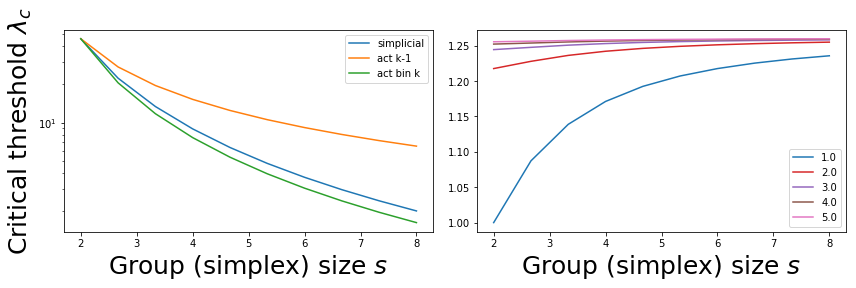

In [129]:
# sanity check 
fig = plt.figure(figsize=(12,4))
plt.subplot(121)
kss = np.linspace(2,8,10)
plt.plot(kss, map(lambda x: threshold_ratio(x,np.mean(act.values()), np.mean(np.array(act.values())**2)), kss), label='simplicial')
plt.plot(kss, map(lambda x: act_threshold_ratio(x-1,np.mean(act.values()), np.mean(np.array(act.values())**2)),kss), label='act k-1')
plt.semilogy(kss, map(lambda x: act_threshold_ratio(x*(x-1)/2,np.mean(act.values()), np.mean(np.array(act.values())**2)),kss), label='act bin k')
plt.legend(loc=0, fontsize=10)
plt.ylabel(r'Critical threshold $\lambda_c$', fontsize=25)
plt.xlabel(r'Group (simplex) size $s$', fontsize=25)

plt.subplot(122)
#colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
colors = ['tab:blue', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
sigma_factors = np.linspace(1,5,5);
a1, a2 = np.mean(act.values()), np.mean(np.array(act.values())**2)
for i, sigma in enumerate(sigma_factors):
    plt.plot(kss, map(lambda x: analytical_simplicial_threshold_ratio(x,sigma*(x**2),a1,a2)/act_threshold_ratio(0.5*(sigma*(x**2) - x),a1,a2), kss), label=sigma, color=colors[i])

#plt.ylabel(r'Critical threshold $\lambda_c$', fontsize=25)
plt.xlabel(r'Group (simplex) size $s$', fontsize=25)
plt.legend(loc=0,fontsize=10)
#plt.yscale('log')
plt.tight_layout()

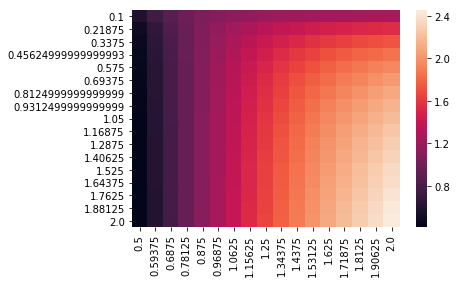

In [175]:
aa = a1;
sigma = 3
deh = {}
smu = 4;
for sigma in linspace(.5,2,17):
    deh[sigma] = {}
    for b in linspace(0.1,2,17):
        a2 = b*a1;
        deh[sigma][b] = analytical_simplicial_threshold_ratio(5,sigma*(smu**2),a1,a2)/act_threshold_ratio(0.5*(sigma*(smu**2) - 5),a1,a2)

import seaborn as sns 
sns.heatmap(pd.DataFrame(deh))

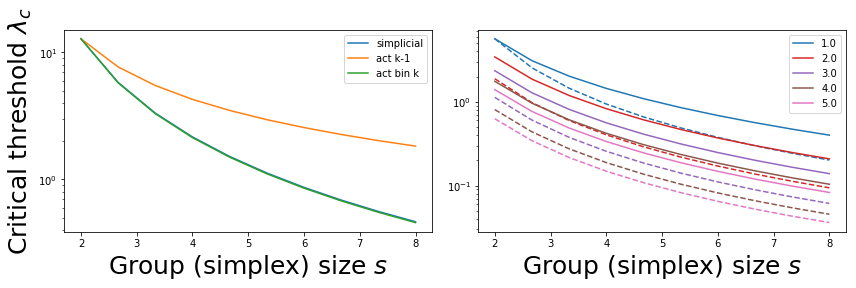

In [156]:
# sanity check 
fig = plt.figure(figsize=(12,4))
plt.subplot(121)
kss = np.linspace(2,8,10)
plt.plot(kss, map(lambda x: threshold_ratio(x,np.mean(act.values()), np.mean(np.array(act.values())**2)), kss), label='simplicial')
plt.plot(kss, map(lambda x: act_threshold_ratio(x-1,np.mean(act.values()), np.mean(np.array(act.values())**2)),kss), label='act k-1')
plt.semilogy(kss, map(lambda x: act_threshold_ratio(x*(x-1)/2,np.mean(act.values()), np.mean(np.array(act.values())**2)),kss), label='act bin k')
plt.legend(loc=0, fontsize=10)
plt.ylabel(r'Critical threshold $\lambda_c$', fontsize=25)
plt.xlabel(r'Group (simplex) size $s$', fontsize=25)

plt.subplot(122)
#colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
colors = ['tab:blue', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
sigma_factors = np.linspace(1,5,5);
a1 = np.mean(act.values())
a2 = 0.5 * a1
for i, sigma in enumerate(sigma_factors):
    plt.plot(kss, map(lambda x: analytical_simplicial_threshold_ratio(x,sigma*(x**2),a1,a2), kss), label=sigma, color=colors[i])
    plt.plot(kss, map(lambda x: act_threshold_ratio(0.5*(sigma*(x**2) - x),a1,a2), kss),'--',color=colors[i])

#plt.ylabel(r'Critical threshold $\lambda_c$', fontsize=25)
plt.xlabel(r'Group (simplex) size $s$', fontsize=25)
plt.legend(loc=0,fontsize=10)
plt.yscale('log')
plt.tight_layout()